#Week 3 - Homework

## DataSet description



1.   **age** - *Age in years*
2.   **sex** - *1 = male; 0 = female*
3.   **cp** - *chest pain type*
4.   **trestbps** - *resting blood pressure (in mm Hg on admission to the hospital)*
5.   **chol** - *serum cholestoral in mg/dl*
6.   **fbs** - *(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)*
7.   **restecg** - *resting electrocardiographic results*
8.   **thalach** - *maximum heart rate achieved*
9.   **exang** - *exercise induced angina (1 = yes; 0 = no)*
10.   **oldpeak** - *ST depression induced by exercise relative to rest*
11.   **slope** - *the slope of the peak exercise ST segment*
12.   **ca** - *number of major vessels (0-3) colored by flourosopy*
13.   **thal** - *3 = normal; 6 = fixed defect; 7 = reversable defect*
14.   **target** - *have disease or not (1=yes, 0=no)*

chol - serum cholestoral in mg/dl 
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
restecg - resting electrocardiographic results 
thalach - maximum heart rate achieved 
exang - exercise induced angina (1 = yes; 0 = no) 
oldpeak - ST depression induced by exercise relative to rest 
slope - the slope of the peak exercise ST segment 
ca - number of major vessels (0-3) colored by flourosopy 
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
target - have disease or not (1=yes, 0=no)

## Load Extensions

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [2]:
data = pandas.read_csv("Heart_Disease_UCI.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Run linear regression on multiple features (one at a time).

### Correlation to find important features

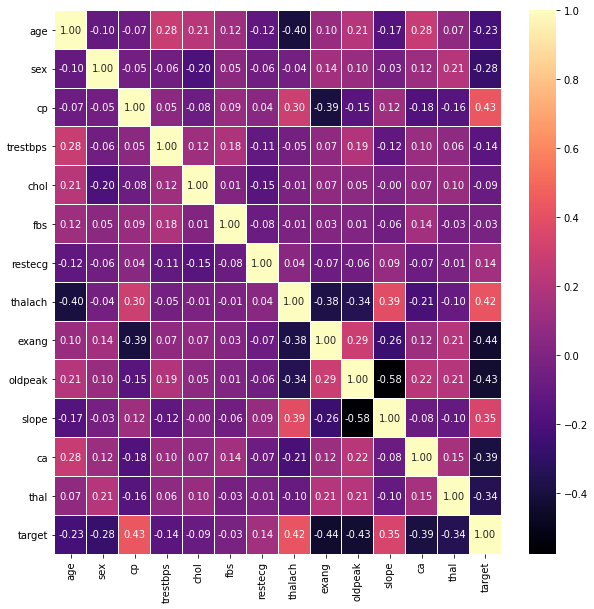

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

Analyzing the correlation using a heat map, we can conclude that **cp (chest pain)** , **thalach (maximum heart rate)** and **slope (slope of the peak exercise** are representative among the other features 

### Heart disease ratio

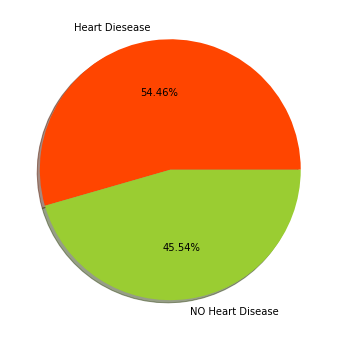

In [ ]:
heart_disease_count = len(data[data['target']==1])
no_heart_disease_count = len(data[data['target']==0])
labels = ["Heart Diesease", "NO Heart Disease"]
sizes = [heart_disease_count, no_heart_disease_count]
colors = ['orangered', 'yellowgreen']
plt.figure(figsize=(8,6))

plt.pie(sizes,labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

### Calculate & Plot Linear Regression method

In [4]:
def plot_linear_regression(x_name, y_name, XName, YName, x_range):
  linearRegression = LinearRegression()
  xAxis = data[x_name]
  yAxis = data[y_name]

  linearRegression.fit(xAxis, yAxis)

  xPlot = x_range
  yPlot = linearRegression.predict(xPlot)

  line = plt.plot(xAxis,yAxis,'o')
  plt.setp(line, linewidth = 3.0)
  plt.plot(xPlot,yPlot)
  plt.xlabel(XName)
  plt.ylabel(YName)

### OldPeak over age distribution

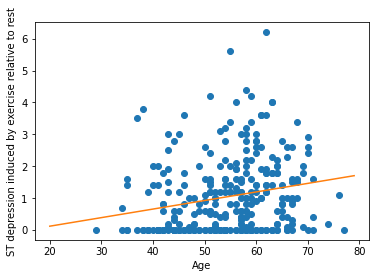

In [8]:
plot_linear_regression('age', 'oldpeak', 'Age', 'ST depression induced by exercise relative to rest', range(20,80))

### Thalach over age distribution

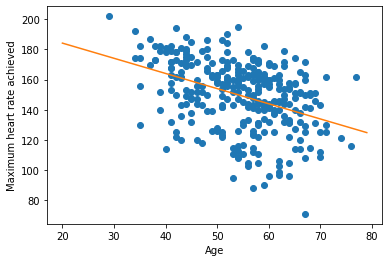

In [ ]:
plot_linear_regression('age', 'thalach', 'Age', 'Maximum heart rate achieved', range(20,80))

### Chol over age distribution

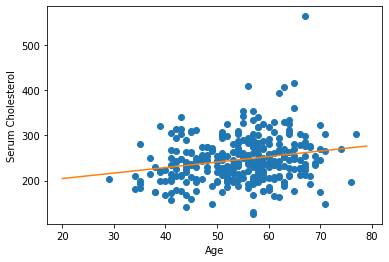

In [ ]:
plot_linear_regression('age', 'chol', 'Age', 'Serum Cholesterol', range(20,80))

### Trestbps over age distribution

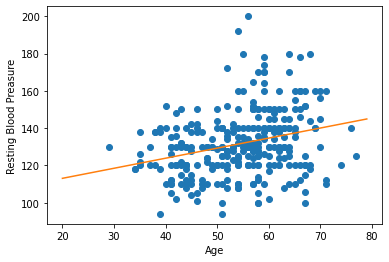

In [ ]:
plot_linear_regression('age', 'trestbps', 'Age', 'Resting Blood Preasure', range(20,80))

### Trestbps over oldpeak

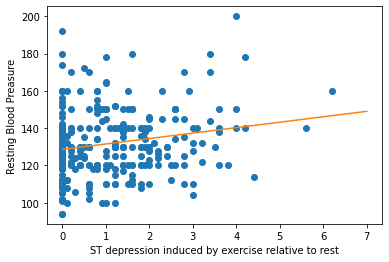

In [ ]:
plot_linear_regression('oldpeak', 'trestbps', 'ST depression induced by exercise relative to rest', 'Resting Blood Preasure', range(0,8))

### Trestbps over thalach

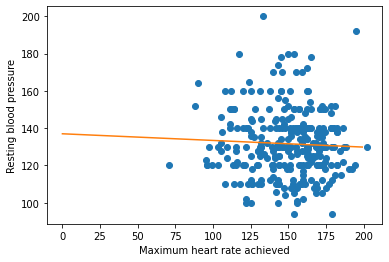

In [ ]:
plot_linear_regression('thalach', 'trestbps', 'Maximum heart rate achieved','Resting blood pressure',  range(0,200))

### trestbps over chol

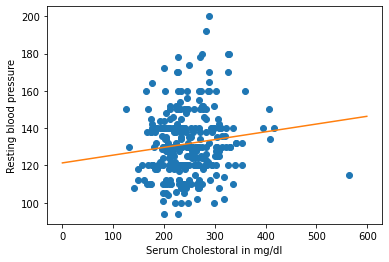

In [ ]:
plot_linear_regression('chol', 'trestbps', 'Serum Cholestoral in mg/dl','Resting blood pressure',  range(0,600))

### Chol over oldPeak

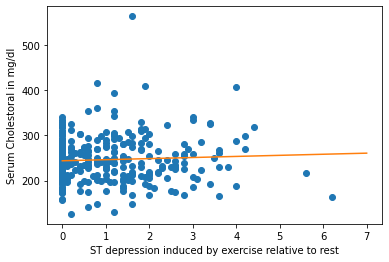

In [ ]:
plot_linear_regression('oldpeak', 'chol','ST depression induced by exercise relative to rest', 'Serum Cholestoral in mg/dl', range(0,8))

### Thalach over oldPeak

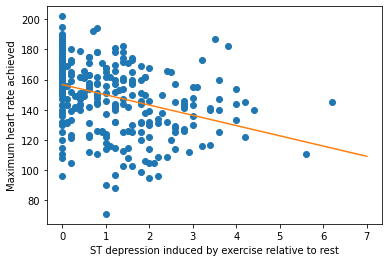

In [ ]:
plot_linear_regression('oldpeak', 'thalach','ST depression induced by exercise relative to rest', 'Maximum heart rate achieved', range(0,8))

## Data Preparation

### Define input and output

In [ ]:
X = data.drop('target', axis=1) #Input
y = data.target #Output

### Split data into training and testing sets

In [ ]:
#Generate 70% of train input data & 30% of test input data.
#Generate 70% of train output data & 30% of test output data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

### Fit the model

In [ ]:
model = RandomForestClassifier(random_state=42) #Use the same random_state as train_test_split 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Make predictions

Make predictions and evaluate the prediction using the classification accuracy performance metric.

In [ ]:
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc) # 

Accuracy: 0.824


After this result:  
```
# Accuracy: 0.824
```
we can conclude that removing the 'target' column from the dataset is safe to work with the most relevant features to feed the model.

## Data Enrichment



## Latent Manifold

## Use the manifold to add features to your data set and run regression or clustering based on those new features. How does this improve the interpretability of your model? How does it add value to your business case?